# Week 1: Supply Chain Emission Analysis

This notebook performs data cleaning and visualization on the US industries supply chain emission dataset.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("SupplyChainEmissionFactorsforUSIndustriesCommodities.csv")
df.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.424,0.041,0.465,NaN,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,NaN,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,NaN,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,NaN,4,2,1,4,1


Clean Data

In [5]:
# Drop completely empty column
df_cleaned = df.drop(columns=["Unnamed: 7"])

# Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Save cleaned data (optional)
df_cleaned.to_csv("Cleaned_SupplyChainEmissionData.csv", index=False)
df_cleaned.head()


,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,111CA,Farms,carbon dioxide,"kg/2018 USD, purchaser price",0.424,0.041,0.465,4,2,1,4,1
1,111CA,Farms,methane,"kg/2018 USD, purchaser price",0.023,0.000,0.023,3,2,1,1,1
2,111CA,Farms,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,4,2,1,4,1
3,111CA,Farms,other GHGs,"kg CO2e/2018 USD, purchaser price",0.004,0.000,0.004,3,2,1,4,1
4,113FF,"Forestry, fishing, and related activities",carbon dioxide,"kg/2018 USD, purchaser price",0.184,0.017,0.201,4,2,1,4,1


Bar Chart - Top 10 Industries

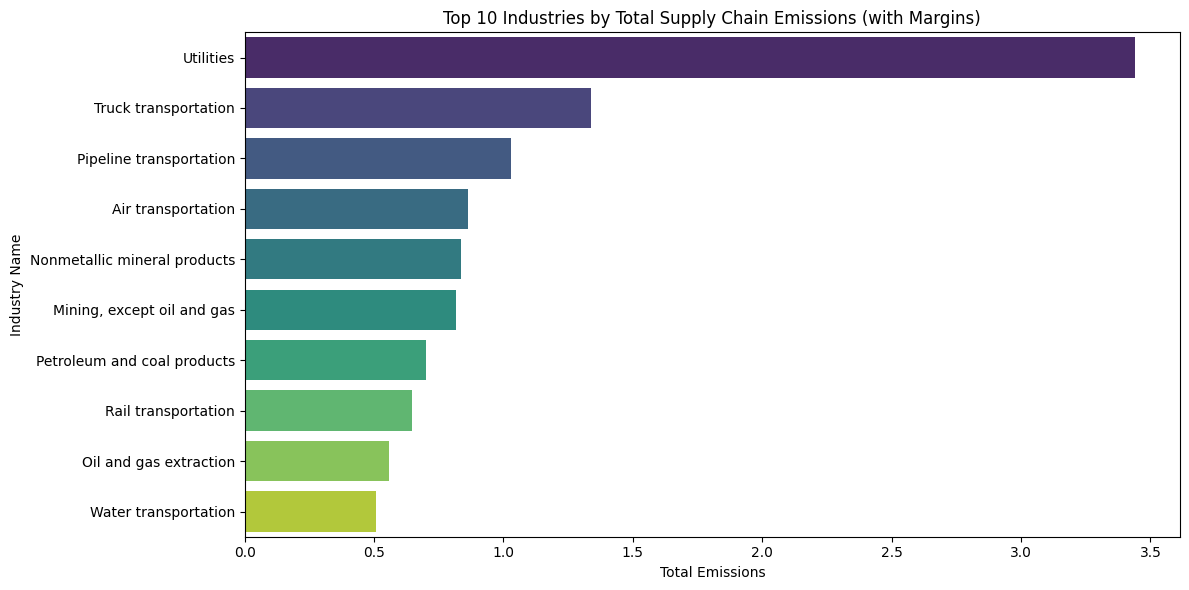

In [7]:
industry_emissions = df_cleaned.groupby("Industry Name")["Supply Chain Emission Factors with Margins"].sum().sort_values(ascending=False).head(10)

top_industries_df = industry_emissions.reset_index()
top_industries_df.columns = ["Industry Name", "Total Emissions"]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_industries_df, x="Total Emissions", y="Industry Name", hue="Industry Name", palette="viridis", legend=False)
plt.title("Top 10 Industries by Total Supply Chain Emissions (with Margins)")
plt.xlabel("Total Emissions")
plt.ylabel("Industry Name")
plt.tight_layout()
plt.show()


Emission Distribution Histogram

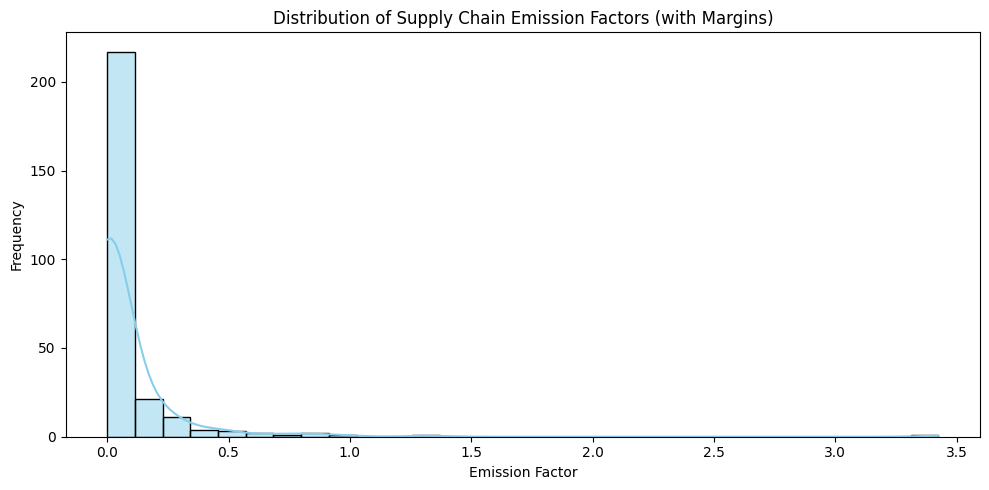

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["Supply Chain Emission Factors with Margins"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Supply Chain Emission Factors (with Margins)")
plt.xlabel("Emission Factor")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
